## **Analyse des données récupérées**

#### Membres du binôme :
- KRISNI Almehdi
- ARICHANDRA Santhos

In [4]:
# Imports
from utils import *

# Rechargement automatique des fichiers importés (vu dans l'UE de Data Science en L3)
%load_ext autoreload
%autoreload 2

# On désactive les affichages
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# On récupère le dataframe pandas contenant toutes les recettes
df = pdCreator(10000, 100, 20000)

# On affiche les informations du dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9334 entries, 0 to 9335
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           9334 non-null   object 
 1   id             9334 non-null   int64  
 2   description    9334 non-null   object 
 3   picture        9334 non-null   object 
 4   servings       9334 non-null   int64  
 5   calories       9334 non-null   float64
 6   reviews        9334 non-null   int64  
 7   rating         9334 non-null   float64
 8   carbohydrates  9334 non-null   float64
 9   dietary fiber  9334 non-null   float64
 10  sugars         9334 non-null   float64
 11  fat            9334 non-null   float64
 12  saturated fat  9334 non-null   float64
 13  cholesterol    9334 non-null   float64
 14  calcium        9334 non-null   float64
 15  iron           9334 non-null   float64
 16  magnesium      9334 non-null   float64
 17  potassium      9334 non-null   float64
 18  sodium  

In [31]:
df.sample(n=100).head()

,name,id,description,picture,servings,calories,reviews,rating,carbohydrates,dietary fiber,sugars,fat,saturated fat,cholesterol,calcium,iron,magnesium,potassium,sodium,ingredients
3383,Slimmers Pumpkin Soup,13407,This soup is great for healthful eating. Be su...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,4,157.2,17,3.5,22.7,1.8,8.9,5.4,2.2,0.0099,0.1853,0.0015,0.0412,0.8374,0.3732,½ cup diced sweet onion #1 tablespoon margarin...
2298,Beef and Pepper Pie,12318,"A delicious blend of beef, Italian peppers, an...",https://imagesvc.meredithcorp.io/v3/mm/image?u...,8,465.3,28,4.3,25.0,2.7,2.6,32.5,12.1,0.0607,0.1413,0.0027,0.0281,0.2921,0.5308,1 pound lean ground beef #2 cups sweet red pep...
1371,Paydirt Peanut Butter Cookies,11383,"Combining scratch and boxed cookie mix, I've c...",https://imagesvc.meredithcorp.io/v3/mm/image?u...,18,495.8,38,4.6,58.6,1.3,24.4,26.8,5.0,0.0000,0.0192,0.0012,0.0271,0.1530,0.3744,1 cup butter flavored shortening #1 cup creamy...
2171,Easy Sweet Potato Pie,12190,This is my family's favorite around the holida...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,8,325.9,59,4.6,34.2,2.6,16.8,17.6,7.8,0.0732,0.1342,0.0013,0.0279,0.3911,0.3804,2 cups cooked and mashed sweet potatoes #2 egg...
585,Cookie Pizza,10591,"Giant cookies topped with coconut, chocolate, ...",https://imagesvc.meredithcorp.io/v3/mm/image?u...,24,366.9,8,3.3,43.9,3.2,28.7,20.6,10.5,0.0370,0.0410,0.0017,0.0511,0.2048,0.2870,1 ½ cups all-purpose flour #2 teaspoons baking...


In [32]:
df["ingredients"].head(5)

0    3 cups all-purpose flour #1 ½ cups white sugar...
1    4 eggs #¼ cup cocoa powder #1 cup white sugar ...
2    ½ teaspoon salt #1 cup peanut butter #1 cup wh...
3    1 cup butter #1 ½ cups all-purpose flour #½ cu...
4    3 egg whites #1 teaspoon distilled white vineg...
Name: ingredients, dtype: object

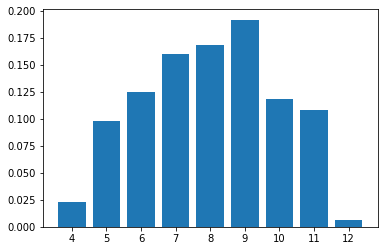

In [33]:
computeFSAscore(df)
showBar(df["FSA_score"].tolist(), odds=True)

In [34]:
df[df["FSA_score"] == 12]["fat"]

674      77.4
815      40.5
1006     35.9
1008     32.7
1048    106.1
        ...  
8629     47.2
8658     38.6
8675     50.8
8922     35.5
9054     46.9
Name: fat, Length: 63, dtype: float64

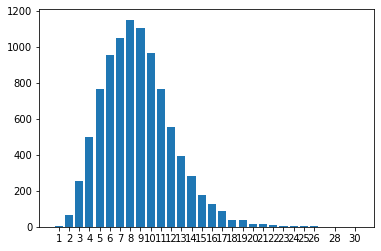

In [35]:
computeNumberIngredients(df)
showBar(df["number_ingredients"].tolist())

In [36]:
# Exclude string columns
dfNoStr = df.select_dtypes(exclude=['object'])
dfNoStr.head(5)

,id,servings,calories,reviews,rating,carbohydrates,dietary fiber,sugars,fat,saturated fat,cholesterol,calcium,iron,magnesium,potassium,sodium,FSA_score,number_ingredients
0,10000,12,599.7,38,3.8,86.6,2.6,54.1,26.9,11.6,0.0640,0.1253,0.0025,0.0392,0.1812,0.4130,11,15
1,10001,12,357.6,13,4.3,35.5,2.0,17.2,22.6,10.8,0.1027,0.0968,0.0021,0.0296,0.1525,0.1965,9,9
2,10002,30,200.0,6,3.9,21.9,0.7,14.6,11.6,2.7,0.0124,0.0135,0.0007,0.0162,0.0799,0.1273,8,9
3,10003,24,116.3,154,4.0,10.9,0.2,2.5,7.8,4.9,0.0203,0.0035,0.0004,0.0020,0.0108,0.0549,6,5
4,10004,8,108.1,19,4.7,26.0,0.0,25.2,0.0,0.0,0.0000,0.0011,0.0000,0.0015,0.0213,0.0213,6,6


In [37]:
cosSimCalc(df, 10000, 10001)

0.9974740985767082

In [38]:
cosSimCalc(df, 10000, 10001, mode=2)

0.7028611945202856

In [39]:
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

# How we access a max value example
print(df["fat"].idxmax())
print(df.loc[8859])

8859
name                                          Tortellini a la Carbonara
id                                                                19297
description           A rich, creamy sauce with bacon and tortellini...
picture               https://imagesvc.meredithcorp.io/v3/mm/image?u...
servings                                                              4
calories                                                         1640.8
reviews                                                              29
rating                                                              4.3
carbohydrates                                                      27.6
dietary fiber                                                       0.8
sugars                                                              0.5
fat                                                               154.9
saturated fat                                                      78.9
cholesterol                                                

In [40]:
recipeSimStats(df, 10000, mode=2)

KeyboardInterrupt: 

In [41]:
picStats(10000)

Brigtness :	 122.2979888888889
Sharpness :	 9.374180970660415
Colorfulness :	 20.11340526415148
Contrast :	 1.0


(122.2979888888889, 9.374180970660415, 20.11340526415148, 1.0)

In [42]:
# We generate a dataframe with only the recipes with pictures
picDf = removeNoPictures(df)
transfPicDf = picDf.select_dtypes(exclude=['object'])
transfPicDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 9335
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8737 non-null   int64  
 1   servings            8737 non-null   int64  
 2   calories            8737 non-null   float64
 3   reviews             8737 non-null   int64  
 4   rating              8737 non-null   float64
 5   carbohydrates       8737 non-null   float64
 6   dietary fiber       8737 non-null   float64
 7   sugars              8737 non-null   float64
 8   fat                 8737 non-null   float64
 9   saturated fat       8737 non-null   float64
 10  cholesterol         8737 non-null   float64
 11  calcium             8737 non-null   float64
 12  iron                8737 non-null   float64
 13  magnesium           8737 non-null   float64
 14  potassium           8737 non-null   float64
 15  sodium              8737 non-null   float64
 16  FSA_sc

In [43]:
picDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 9335
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8737 non-null   object 
 1   id                  8737 non-null   int64  
 2   description         8737 non-null   object 
 3   picture             8737 non-null   object 
 4   servings            8737 non-null   int64  
 5   calories            8737 non-null   float64
 6   reviews             8737 non-null   int64  
 7   rating              8737 non-null   float64
 8   carbohydrates       8737 non-null   float64
 9   dietary fiber       8737 non-null   float64
 10  sugars              8737 non-null   float64
 11  fat                 8737 non-null   float64
 12  saturated fat       8737 non-null   float64
 13  cholesterol         8737 non-null   float64
 14  calcium             8737 non-null   float64
 15  iron                8737 non-null   float64
 16  magnes

In [46]:
generate_user_experience(df, 5, 25, 0.6, mode=2)

The experience user model id.25 has been created..25 ...


In [ ]:
for i in range(5) :
    generate_user_experience(df, 10, i * 60, 0.8, mode=2)